In [1]:
!pip install nltk

In [2]:
!pip install wordcloud

In [3]:
import nltk

In [4]:
#nltk.download()

In [5]:
import pandas as pd
reviews = pd.read_csv('K8 Reviews v0.2.csv')

In [6]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [7]:
from wordcloud import WordCloud

In [8]:
reviews.shape

(14675, 2)

In [9]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [10]:
reviews_combined =" ".join(reviews.review.values)

In [11]:
reviews_combined[:100]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hel'

In [12]:
word_cloud = WordCloud().generate(reviews_combined)

In [13]:
import matplotlib.pyplot as plt

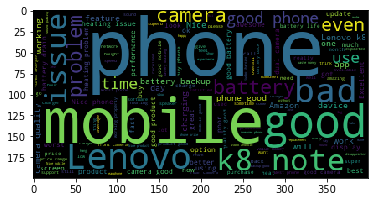

In [14]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [15]:
x = reviews['review'].head()
for i in x:
    
    results = set()
    reviews['review'].str.lower().str.split().apply(results.update)
    print (results)

{'mobile...i', 'then.10.auto', 'superbely...', 'much.....', 'future.....', 'wellif', 'blacked', 'lenovo...n', 'chutne', ')iphone', 'malfunction.5.)', 'best.', 'disconnected.', 'out.update', 'should,', 'fantastic', 'budget.', '11k.', 'immediatelybecause', 'owesome...but', 'patch.', 'problem.please', 'oromised', 'plus.', 'items...', 'recommend...', 'oz', 'charging...cast', 'showing.3.', '"there', 'lightgame', 'customization.', 'experience.the', 'gamer,', 'distinguish', '(fully', 'expires', 'more..', 'reception', 'horrible.sometimes', 'buget,this', 'camera.5.worth', 'crime', 'fair..', 'weary', 'add-on.-', 'phablet', 'antutu', 'probelom', 'fuction', 'faster,', 'inko', 'performance:-', 'camera.very', 'ossam', 'spectacular', 'amazing.battery', 'usage2.', 'bend', 'conned,', 'proud.', "price.i've", 'money...of', 'design,powerful', 'opetion', 'haging.....', 'finish3)', 'sell.after', 'respect.', '11000.', '..over', 'forget', 'bass.4', 'this...amz', '05/09/2017,', 'snart', 'b&w,', 'note,,', 'warm

{'mobile...i', 'then.10.auto', 'superbely...', 'much.....', 'future.....', 'wellif', 'blacked', 'lenovo...n', 'chutne', ')iphone', 'malfunction.5.)', 'best.', 'disconnected.', 'out.update', 'should,', 'fantastic', 'budget.', '11k.', 'immediatelybecause', 'owesome...but', 'patch.', 'problem.please', 'oromised', 'plus.', 'items...', 'recommend...', 'oz', 'charging...cast', 'showing.3.', '"there', 'lightgame', 'customization.', 'experience.the', 'gamer,', 'distinguish', '(fully', 'expires', 'more..', 'reception', 'horrible.sometimes', 'buget,this', 'camera.5.worth', 'crime', 'fair..', 'weary', 'add-on.-', 'phablet', 'antutu', 'probelom', 'fuction', 'faster,', 'inko', 'performance:-', 'camera.very', 'ossam', 'spectacular', 'amazing.battery', 'usage2.', 'bend', 'conned,', 'proud.', "price.i've", 'money...of', 'design,powerful', 'opetion', 'haging.....', 'finish3)', 'sell.after', 'respect.', '11000.', '..over', 'forget', 'bass.4', 'this...amz', '05/09/2017,', 'snart', 'b&w,', 'note,,', 'warm

In [16]:
y = reviews.review.str.split(expand=True).stack().value_counts().reset_index()
words =y['index']
freq =y[0]

In [17]:
print(words)

0                        is
1                       the
2                       not
3                       and
4                     phone
5                        to
6                      this
7                        in
8                         I
9                      good
10                      for
11                        a
12                       it
13                       of
14                     very
15                     with
16                      but
17                  battery
18                   camera
19                   mobile
20                  product
21                       on
22                       as
23                     Good
24                      are
25                   Lenovo
26                     have
27                       my
28                  quality
29                      buy
                ...        
30289     headphones....And
30290                  Fack
30291             yourself.
30292               status.
30293               

In [18]:
l=[]
d={}
l = reviews_combined.split(" ")
for word in l:
    d[word] =d.get(word,0) + 1

In [ ]:
plt.bar(words, freq, align='center', alpha=0.5)
plt.xlabel('words')
plt.ylabel('freq')
plt.title('words usage')

plt.show()

In [20]:
word_cloud = WordCloud(width=880, height=800,background_color='white', max_words=150).\
generate_from_text(reviews_combined)

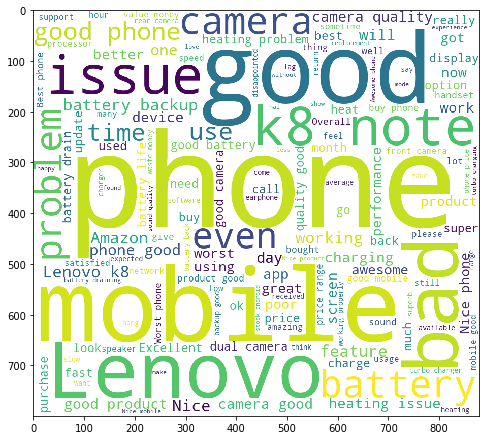

In [21]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

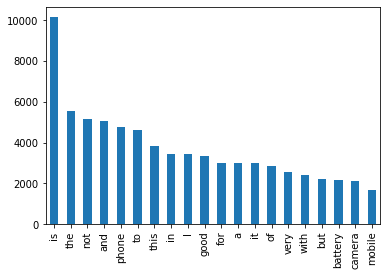

In [22]:
reviews.review.str.split(expand=True).stack().value_counts()[:20].plot(kind='bar')

#### problems with the above visuals
- case is non uniform
- punctuations and stop words(connectors like is, the etc.)
- words with diffrent tense forms like change, changing, changes has its root form in change

In [23]:
from nltk.tokenize import word_tokenize

In [24]:
all_terms = word_tokenize(reviews_combined.lower())

In [25]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [26]:
from nltk.probability import FreqDist

In [27]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

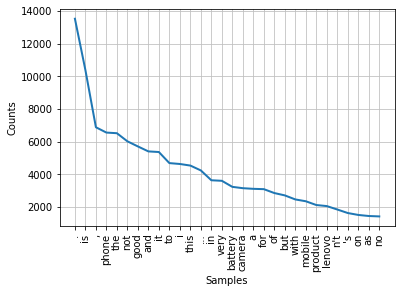

In [28]:
fdist.plot(30,cumulative=False)
plt.show()

#### the most commonly used and the least commonly used words in any language includes:
- language connectorscalled stop words
- punctuations

In [29]:
from string import punctuation
from nltk.corpus import stopwords

In [30]:
stop_nltk = stopwords.words("english")

In [31]:
stop_updated = stop_nltk+ ["...","..","!!"]+['phone','mobile','lenovo','k8','note','amazon',"n't"]

In [32]:
reviews_updated1 = [term for term in all_terms if term not in stop_updated and term not in list(punctuation) and len(term)>2]

In [33]:
print(reviews_updated1)

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january..', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'returning', '.highly', 'disappointing', 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot..really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', 'buy', 'thing', 'better', 'options', 'wrost', 'good', '

In [34]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [35]:
 stemmer_s = SnowballStemmer("english")

In [36]:
#combine all the steps and create udf
# takes one review as input and returns a cleaned review as a string
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens if term not in stop_updated and term not in list(punctuation) and len(term)>2]
    res = " ".join(stemmed)
    return res

In [37]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [38]:
reviews['clean_review'].head(5)

0                               good need updat improv
1    worst bought ever batteri drain like hell back...
2                      get cash back alreadi january..
3                                                 good
4    worst everthey chang last problem still return...
Name: clean_review, dtype: object

In [39]:
reviews.clean_review.str.split(expand=True).stack().value_counts().nunique()

297

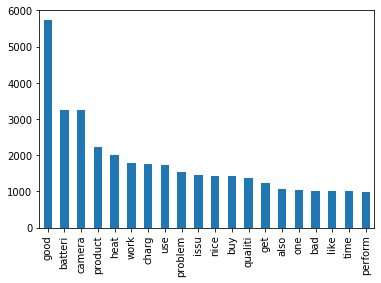

In [40]:
reviews.clean_review.str.split(expand=True).stack().value_counts()[:20].plot(kind='bar')